In [2]:
import finesse.virgo

# Tunings Check

The purpose of this notebook is to test the ability to save dof tunings in the mirror phi tunings.

1. Create a Virgo model
2. Add imperfections
3. Pretune & lock (resulting in non-zero DOF tunings)
4. Plot the DARM transfer function
5. Zero the DOFs
6. Unparse and remove DOFs
7. Create a new model using the DOFless model
8. Plot DARM again to show it is still tuned

## 1. Create a Virgo model

In [3]:
virgo = finesse.virgo.Virgo(maxtem='off')

## 2. Add imperfections

In [7]:
# nudge the beam splitter
virgo.model.BS.phi = 1

# introduce mismatch
virgo.model.PR.Rcx -= 0.01
virgo.model.PR.Rcy -= 0.01

## 3. Pretune and lock

In [8]:
virgo.make(dc_lock=False)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Done.


## 4. Plot DARM as reference

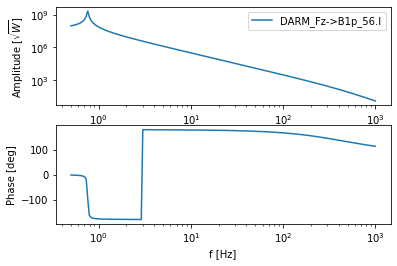

In [9]:
virgo.plot_DARM()

## 5. Zero the DOFs

In [29]:
virgo.zero_dofs()

virgo.print_tunings()

┌───────┬─────────────────┬─────────────────┐
│ Optic │    Tuning (deg) │      Tuning (m) │
╞═══════╪═════════════════╪═════════════════╡
│ NE    │        0.748979 │     2.21365e-09 │
├───────┼─────────────────┼─────────────────┤
│ WE    │       -0.748973 │    -2.21363e-09 │
├───────┼─────────────────┼─────────────────┤
│ NI    │        0.748994 │     2.21369e-09 │
├───────┼─────────────────┼─────────────────┤
│ WI    │       -0.748994 │    -2.21369e-09 │
├───────┼─────────────────┼─────────────────┤
│ PR    │        0.748408 │     2.21196e-09 │
├───────┼─────────────────┼─────────────────┤
│ SR    │         88.2387 │     2.60794e-07 │
└───────┴─────────────────┴─────────────────┘

┌──────┬─────────────────┬─────────────────┐
│ DOF  │    Tuning (deg) │      Tuning (m) │
╞══════╪═════════════════╪═════════════════╡
│ DARM │               0 │               0 │
├──────┼─────────────────┼─────────────────┤
│ CARM │               0 │               0 │
├──────┼─────────────────┼─────────────

[['DOF', 'Tuning (deg)', 'Tuning (m)'],
 ['DARM', '              0', '              0'],
 ['CARM', '              0', '              0'],
 ['MICH', '              0', '              0'],
 ['PRCL', '              0', '              0'],
 ['SRCL', '              0', '              0']]

## 6. Unparse and remove DOF commands

In [30]:
virgo2 = virgo.model.unparse_file('virgo_tuned_zeroed.kat')

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet


## 7. Create a DOF-less model from tuned file

In [31]:
virgo2 = finesse.virgo.Virgo(file_to_parse='virgo_tuned_zeroed.kat')

# assert the DOF.DC values are zero
for dof in virgo2.dofs:
    assert virgo2.model.get(dof).DC == 0

## 8. Plot DARM again

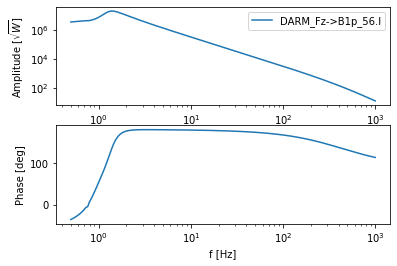

In [32]:
virgo2.plot_DARM()